在这个教程中，你将会学到如何用高德地图api抓取行政区划

<div class="alert alert-info"><h2>提供的基础数据是：</h2><p>
    没有，我们的数据无中生有<br><br></div>

# 观察网络连接行为

我们从高德地图抓，先观察一下如果在高德地图输入深圳的某一个行政区划查询，它的网络连接行为是怎样的
    
谷歌浏览器右键检查，或者点设置里面的开发者工具，再点network选项，可以看到网络的连接行为（其他浏览器也有类似的功能，需要找一找）

<a href="https://mp.weixin.qq.com/s/97xjbnYBf_y49GF1SUNl-w">爬虫的原理在这里</a>我们这里用到的是爬虫2.0

每个网络访问中，有

    Response Headers(响应头)
    Request Headers(请求头)
    Query String Parameters(查询参数)
    
其中，请求头和查询参数是我们要关注的

# json数据格式

在网络访问行为中，对方服务器返回给我们的数据是json结构，那么json是什么呢

先补充一下基础知识，学习一下python的

<a href="https://www.runoob.com/python/python-lists.html">list</a>

<a href="https://www.runoob.com/python/python-dictionary.html">dict</a>

<a href="https://www.runoob.com/python/python-tuples.html">tuple</a>

把list,dict,tuple自由组合起来就变成了json

<a href="https://www.runoob.com/json/json-tutorial.html">JSON 实例</a>

直接从高德地图抓是比较困难的，有防爬机制

不过，高德专门为开发者提供了抓数据的接口

<a href="https://lbs.amap.com/">高德地图开放平台</a>

各位需要注册一下高德开发者申请一个key

在其中，高德已经给我们提供了开发者专用的行政区查询服务，以及相关说明<a href="https://lbs.amap.com/api/javascript-api/guide/services/district-search">行政区查询</a>

在其中选择一个行政区查询，然后看看网络连接行为吧

# 开始抓行政区划

In [1]:
#导入必要的爬虫包
import urllib
from urllib import parse
from urllib import request

import pandas as pd
#导入json包，后面解析json数据
import json

In [2]:
mykey = '在此输入你的key'
#这个输入你开发者key，告诉高德这个数据是你抓的，每天会有限额，你们可以注册成为开发者，这样就有自己的key拉

In [3]:
keywords = '罗湖区'

#查询的接口地址
url = 'https://restapi.amap.com/v3/config/district?'

#查询的条件
dict1 = {
'subdistrict':'3',
    'showbiz':'false',
    'extensions':'all',
    'key':mykey,#这个是我的开发者key，告诉高德这个数据是我抓的，每天会有限额，你们可以注册成为开发者，这样就有自己的key拉
    's':'rsv3',
    'output':'json',
    'level':'district',
    'keywords':keywords,
    'platform':'JS',
    'logversion':'2.0',
    'sdkversion':'1.4.10'
}

#把查询条件组合成网页地址
url_data = parse.urlencode(dict1)
url = url+url_data

#创建一个访问器
request = urllib.request.Request(url)

#访问网页
response = urllib.request.urlopen(request)

#读取网页内容
webpage = response.read()

#将内容用json解析
result = json.loads(webpage.decode('utf8','ignore'))

In [4]:
#数据中保存了polyline的线形
result

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'count': '1',
 'suggestion': {'keywords': [], 'cities': []},
 'districts': [{'citycode': '0755',
   'adcode': '440303',
   'name': '罗湖区',
   'polyline': '114.105177,22.531626;114.104808,22.532512;114.104774,22.535038;114.104757,22.535105;114.104772,22.5352;114.104764,22.535834;114.104699,22.540773;114.104687,22.541316;114.104589,22.546031;114.104519,22.547975;114.104464,22.548114;114.104502,22.548445;114.104486,22.548663;114.10449,22.548786;114.104477,22.549163;114.104506,22.549251;114.104505,22.549327;114.10447,22.549363;114.104341,22.552936;114.104281,22.555434;114.104472,22.555779;114.104487,22.555809;114.104508,22.555845;114.104557,22.555933;114.104576,22.556013;114.104576,22.556037;114.104574,22.556168;114.10456,22.556475;114.10456,22.556561;114.104559,22.556903;114.104552,22.557291;114.104551,22.557399;114.104547,22.557726;114.104541,22.557852;114.104542,22.558166;114.104536,22.558579;114.104534,22.558701;114.104529,22.559019;

# 行政区划边界线型数据提取

In [14]:
#将polyline的线型从result中提取
polyline = result['districts'][0]['polyline']

###############################你需要在下面写代码##################################
#想办法把polyline变成一个dataframe，两列，第一列是lon，第二列是lat
#提示：可以用for循环遍历
#或者可以用re包，一次指定多个分隔符分割字符串，然后用numpy的reshape方法，再变成dataframe


###################################################################################

polyline.head(5)

,lon_lst,lat_lst
0,114.105177,22.531626
1,114.104808,22.532512
2,114.104774,22.535038
3,114.104757,22.535105
4,114.104772,22.535200


# 火星坐标转换

从高德抓下来的坐标系是GCJ02,俗称<a href="https://blog.csdn.net/huangli0/article/details/81840937">火星坐标系统</a>，而我们平时用的是WGS84坐标系，因此，需要进行坐标转换，转换的方法有大神开源出来了



[geo_convert](https://github.com/gaussic/geo_convert)

好的，我们这里对每一行应用一下这个算法转换，建议使用geopandas的apply函数

In [18]:
###############################你需要在下面写代码##################################
#坐标转换

###################################################################################
polyline.head(5)

,lon_lst,lat_lst
0,114.100060,22.534309
1,114.099691,22.535195
2,114.099657,22.537721
3,114.099640,22.537788
4,114.099655,22.537883


# 用线型生成geodataframe

这个~前面教程有哦，写一写巩固一下

这里你要做的操作，就是将polyline变成shapely里面的Polygon，然后再转换为geodataframe

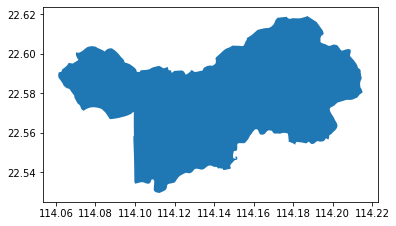

In [19]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Point,Polygon,shape


###############################你需要在下面写代码##################################
#线型生成geodataframe
#提示Polygon(polyline.values)
###################################################################################
dataline.plot()

# 作业

## 抓全深圳的行政区划

可以把上面的抓取过程写成一个函数，输入是行政区划的名字，输出是坐标点或shapely的polygon或geodataframe

这样只要循环一下，就可以生成全深圳的行政区划了

然后不要忘了把geopandas保存成shp

特别注意：在一个行政区划由多个面组成时，坐标串中间以'|'分隔